In [263]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [97]:
# Use fivethirtyeight styling, because I like it
import matplotlib.style as style
style.use('seaborn-whitegrid')

In [69]:
df = pd.read_csv('backups/backup_df_from_scraping.csv')

In [70]:
df2 = df.copy()

In [72]:
# # Drop NAs for walk_score, income and transit_score columns
df2 = df2.dropna(subset=['walk_score'])
df2 = df2.dropna(subset=['income'])
df2 = df2.dropna(subset=['transit_score'])

In [73]:
# Drop columns we no longer need
df2 = df2.drop((['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'date', 'bike_score', 'Neighborhood', 'lat', 'long']), axis=1)

In [160]:
df2 = df2.drop('GEOID', axis=1)

In [74]:
# Looking for outliers greater than 3 std's away from mean
df2['price'].mean() + (3 * df2['price'].std())

1577949.0168299316

In [75]:
# Drop outliers in price (230 records). Outliers = over 3 standard deviations greater than mean.
# 3 standard deviations greater than mean: $1,577,949
mask = df2[df2['price'] >=  (df2['price'].mean() + (3 * df2['price'].std()))]
df2.drop(mask.index, inplace=True)

In [76]:
df2.count()

price               14752
bedrooms            14752
bathrooms           14752
sqft_living         14752
sqft_lot            14752
floors              14752
waterfront          14752
view                14752
condition           14752
grade               14752
sqft_above          14752
sqft_basement       14752
yr_built            14752
yr_renovated        14752
zipcode             14752
sqft_living15       14752
sqft_lot15          14752
Address             14752
walk_score          14752
transit_score       14752
pers_crime_score     5855
prop_crime_score     5855
GEOID               14752
income              14752
dtype: int64

In [77]:
# Cleaning single digit columns from scraped data (it contained an extra backslash)
# Recasting columns as integers rather than float

def remove_chars(x):
    if '/' in x:
        x=x[1]
    return x

df2['walk_score'] = df2['walk_score'].astype('str').apply(remove_chars).astype('int')
df2['transit_score'] = df2['transit_score'].astype('str').apply(remove_chars).astype('int')
df2['income'] = df2['income'].astype('int')

In [78]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'Address', 'walk_score', 'transit_score',
       'pers_crime_score', 'prop_crime_score', 'GEOID', 'income'],
      dtype='object')

In [79]:
# Drop duplicates. There were 5 duplicates.

df2.drop_duplicates(subset=['price',
       'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15'], inplace=True)

In [ ]:
pd.to_numeric(df2['walk_score'], errors='coerce')

In [81]:
df2['transit_score'] = df2['transit_score'].astype('str').apply(remove_chars).astype('int')

In [161]:
df3 = df2.copy()

In [282]:
df3 = df3.dropna(subset=['pers_crime_score'])
df3 = df3.dropna(subset=['prop_crime_score'])

In [ ]:
df3.info()

In [ ]:
# plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_xlim([0,2000000])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
ax.set(xlabel='Home price', ylabel='Cumulative density')
# ax.set_ylim([0.0,1.0])
ax.set_xlim([0,1570000])
plt.hist(df3['price'], bins=30, edgecolor='black', cumulative=True, density=True);

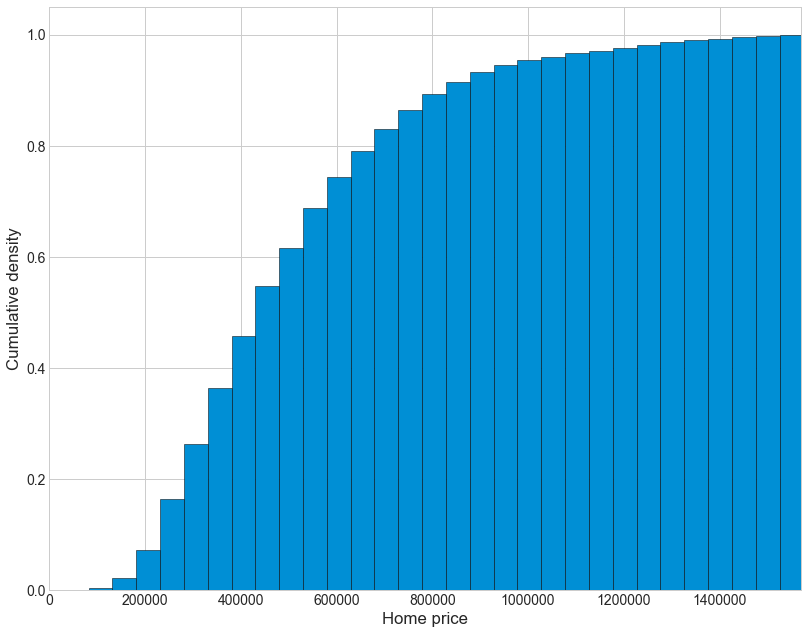

In [157]:
# plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_xlim([0,2000000])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
ax.set(xlabel='Home price', ylabel='Cumulative density')
# ax.set_ylim([0.0,1.0])
ax.set_xlim([0,1570000])
plt.hist(df3['price'], bins=30, edgecolor='black', cumulative=True, density=True);

In [315]:
labels = list(range(0, 700, 100))

In [296]:
xlabels2 = ['', '$200k', '$400k', '$600k', '$800k', '$1.0m', '$1.2m', '$1.4m', '$1.6m']

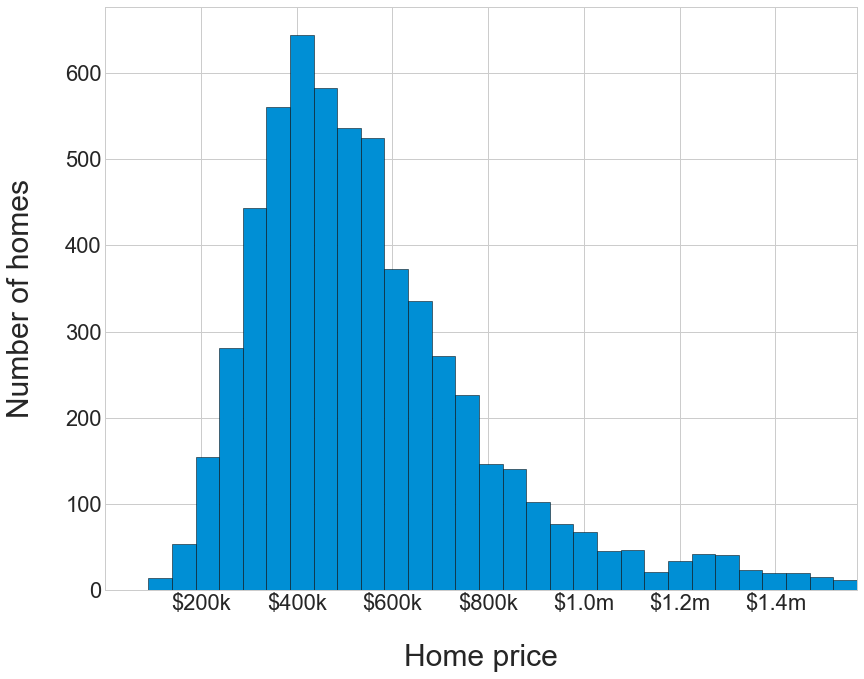

In [345]:
# plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_xlim([0,2000000])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
# ax.set(xlabel='Home price', ylabel='Number of homes')
ax.set_xlim([0,1570000])
ax.set_xlabel(xlabel='Home price', labelpad=30, fontsize=30)
ax.set_ylabel(ylabel='Number of homes', labelpad=30, fontsize=30)
ax.set_xticklabels(xlabels2, fontsize=22)
ax.set_yticklabels(labels, fontsize=22)
plt.hist(df3['price'], bins=30, edgecolor='black', cumulative=False);
plt.savefig('hist.jpg', dpi=300)

In [332]:
ylabels2 = list(range(0,900,100))

In [335]:
ylabels2[0] = ''

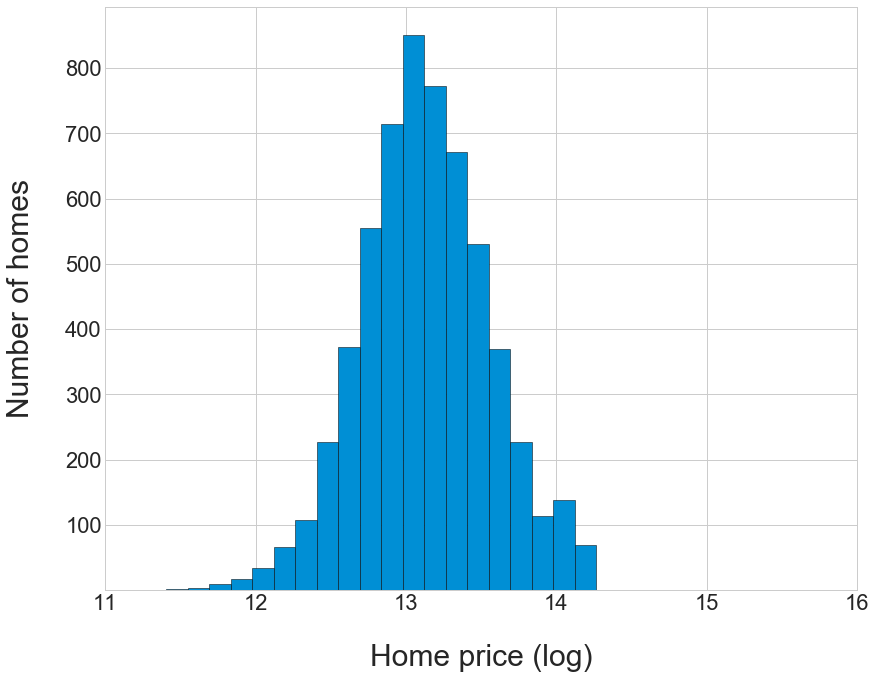

In [347]:
# plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_xlim([0,2000000])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
# ax.set(xlabel='Home price', ylabel='Number of homes')
ax.set_xlim([11,16])
ax.set_xlabel(xlabel='Home price (log)', labelpad=30, fontsize=30)
ax.set_ylabel(ylabel='Number of homes', labelpad=30, fontsize=30)
ax.set_xticklabels([11,12,13,14,15,16], fontsize=22)
ax.set_yticklabels(ylabels2, fontsize=22)
plt.hist(df3['log_price'], bins=20, edgecolor='black', cumulative=False);
plt.savefig('log_price_histogram', dpi=300)

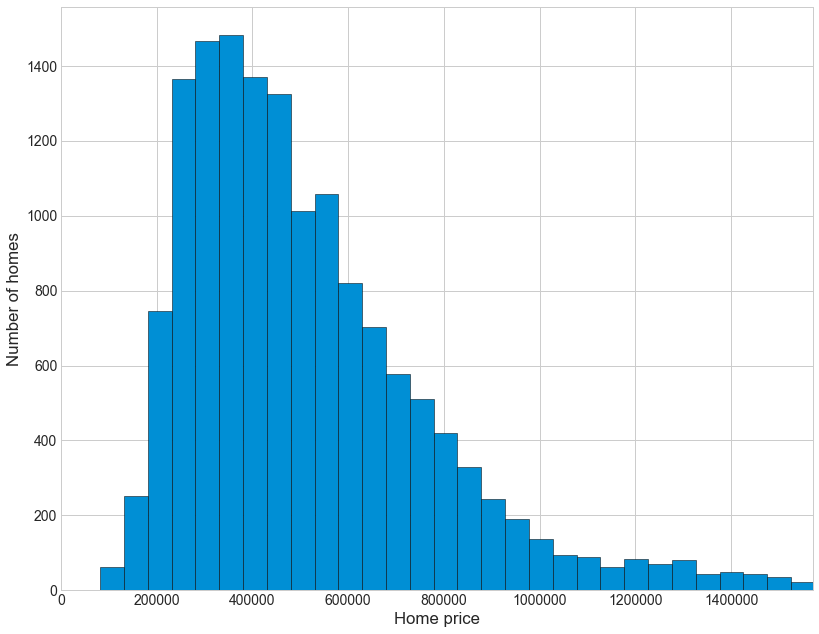

In [156]:
# plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_xlim([0,2000000])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
ax.set(xlabel='Home price', ylabel='Number of homes')
ax.set_xlim([0,1570000])
ax.set_xlabel(labelpad=30, fontsize=30)
ax.set_ylabel(labelpad=30, fontsize=30)
plt.hist(df3['price'], bins=30, edgecolor='black', cumulative=False);

In [169]:
df3['renovated_yrs_ago'] = 2015 - df3['renovated_2']

In [204]:
# Changing letter grades to numerical values

def make_grade_numerical(x):
    if x=='A':
        return 1
    elif x=='B':
        return 2
    elif x=='C':
        return 3
    elif x=='D':
        return 4
    elif x=='E':
        return 5
    else:
        return x
    

df3['prop_crime_score'] = df3['prop_crime_score'].apply(make_grade_numerical)
df3['pers_crime_score'] = df3['prop_crime_score'].apply(make_grade_numerical)

In [175]:
# Change year built to # of years ago house was built
df3['yr_built'] = 2015 - df['yr_built']

In [ ]:
# Making the crime scores numerical since they were letter grades before
pd.to_numeric(df3['prop_crime_score'], errors='coerce')
pd.to_numeric(df3['pers_crime_score'], errors='coerce')

In [207]:
# Dropping rows we no longer need
df3 = df3.drop('Address', axis=1)
df3 = df3.drop('zipcode', axis=1)

In [216]:
# Creating new variable, log of home price <-- our target/dependent variable
df3['log_price'] = df3['price'].apply(lambda x: np.log(x))

In [280]:
# Drop rows that don't have a Walk Score grade for personal and property crime
df3['pers_crime_score'].dropna(inplace=True)
df3['prop_crime_score'].dropna(inplace=True)

In [217]:
df3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'walk_score', 'transit_score', 'pers_crime_score',
       'prop_crime_score', 'income', 'renovated_yrs_ago', 'log_price'],
      dtype='object')

In [242]:
# Set our X and y in preparation for train/test/split
X = df3[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'walk_score', 'transit_score', 'income', 'renovated_yrs_ago']]

y = df3['log_price']

In [ ]:
# Export data so I can use this in the next steps
df3.to_csv('final_data_set.csv')

In [285]:
df3 = pd.read_csv('final_data_set.csv')

In [275]:
df3 = df3.drop('Unnamed: 0', axis=1)

In [277]:
df3 = df3.drop('yr_renovated', axis=1)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [289]:
lm = LinearRegression()

In [290]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [291]:
predictions = lm.predict(X_test)

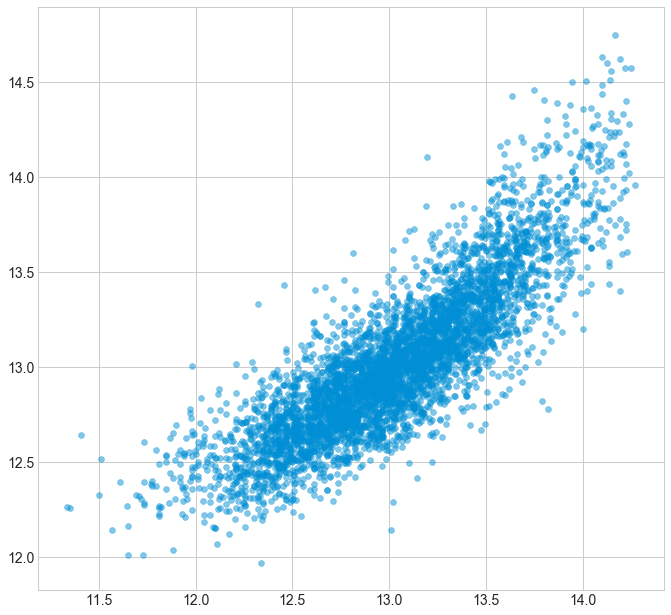

In [292]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, alpha=0.5)

In [261]:
create_reg_string(X)

 + bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15 + walk_score + transit_score + income


In [256]:
df3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'walk_score', 'transit_score', 'pers_crime_score',
       'prop_crime_score', 'income', 'renovated_yrs_ago', 'log_price'],
      dtype='object')

In [264]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('log_price ~ + bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15 + walk_score + transit_score + income', data=df3, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     2323.
Date:                Wed, 10 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:00:52   Log-Likelihood:                -356.68
No. Observations:               14747   AIC:                             749.4
Df Residuals:                   14729   BIC:                             886.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.2011      0.025    407.611      0.000      10.152      10.250
bedrooms         -0.0089      0.003     -3.222      0.001      -0.014      -0.003
bathrooms         0.0434      0.005      8.938      0.000       0.034       0.053
sqft_living       0.0001    3.6e-06     31.363      0.000       0.000       0.000
sqft_lot       3.492e-07   1.02e-07      3.414      0.001    1.49e-07     5.5e-07
floors           -0.0004      0.006     -0.063      0.950      -0.011       0.011
waterfront        0.4573      0.039     11.860      0.000       0.382       0.533
view              0.0637      0.003     19.234      0.000       0.057       0.070
condition         0.0623      0.003     18.065      0.000       0.056       0.069
grade             0.1394      0.003     41.372      0.000       0.133       0.146
sqft_above     6.317e-05   3.63e-06     17.379      0.000     5.6e-05    7.03e-05
sqft_basement  4.977e-05    4.1e-06     12.126      0.000    4.17e-05    5.78e-05
yr_built          0.0018      0.000     16.166      0.000       0.002       0.002
yr_renovated   4.091e-05   5.55e-06      7.366      0.000       3e-05    5.18e-05
sqft_living15  7.802e-05   5.76e-06     13.545      0.000    6.67e-05    8.93e-05
sqft_lot15     7.419e-07   1.69e-07      4.386      0.000     4.1e-07    1.07e-06
walk_score        0.0038      0.000     29.091      0.000       0.004       0.004
transit_score     0.0054      0.000     27.662      0.000       0.005       0.006
income          6.08e-06   8.28e-08     73.446      0.000    5.92e-06    6.24e-06
==============================================================================
Omnibus:                      220.695   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.816
Skew:                          -0.176   Prob(JB):                     1.31e-70
Kurtosis:                       3.633   Cond. No.                     1.66e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.7e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""